In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
# Средняя квадратическая ошибка
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [5]:
# Функция стандартизации
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
# Градиентный спуск
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [7]:
# Cтохастический градиентный спуск
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [8]:
X_st = X.copy().astype(np.float64)
X_st[1] = calc_std_fit(X[1])
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [9]:
%%time
eval_model(X_st, y, iterations=2000, alpha=1e-2)

200 [55.52530192  5.0176068   2.73259564  4.63674065] 27.565796683922333
400 [56.48285706  5.69750594  1.61821598  5.1289407 ] 25.568500879273323
600 [56.49969849  5.97637014  0.93195456  5.56511755] 25.1906990291268
800 [56.4999947   6.10903439  0.49247139  5.88819923] 25.03029699277215
1000 [56.49999991  6.18116     0.20547141  6.11300887] 24.96005323075205
1200 [5.65000000e+01 6.22420618e+00 1.62941134e-02 6.26547665e+00] 24.929090715974546
1400 [56.5         6.25132389 -0.10894668  6.36772963] 24.915424047467255
1600 [56.5         6.26889093 -0.1920266   6.43596221] 24.90938991519506
1800 [56.5         6.28042634 -0.24718964  6.48138958] 24.906725552147268
2000 [56.5         6.28804962 -0.28383211  6.51160241] 24.905549091176564
Wall time: 40.5 ms


array([56.5       ,  6.28804962, -0.28383211,  6.51160241])

In [10]:
%%time
eval_sgd_model(X_st, y, iterations=2000, qty_in_batch=3, alpha=1e-2)

200 [55.48696688  5.88936264  2.2229441   4.33046734] 23.324716199927927
400 [56.47916095  5.97315695  1.36508874  5.11471228] 13.00952662840971
600 [56.49700597  6.06561087  0.78750281  5.61735401] 11.958066279638778
800 [56.49736751  6.13753661  0.4005682   5.94470175] 11.404918784568288
1000 [56.49739872  6.18850723  0.14252187  6.16014255] 11.059123644471049
1200 [ 5.64974147e+01  6.22333934e+00 -2.92053564e-02  6.30264509e+00] 10.836317519779547
1400 [56.497425    6.24677472 -0.1433775   6.39712225] 10.690753624047847
1600 [56.49743172  6.26243322 -0.21925073  6.45982641] 10.594961393489745
1800 [56.49743616  6.27286272 -0.26966211  6.50146345] 10.531674785539948
2000 [56.4974391   6.27979945 -0.30315312  6.52911769] 10.489771662576638
Wall time: 152 ms


array([56.4974391 ,  6.27979945, -0.30315312,  6.52911769])

__1__. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [11]:
# L2 регуляризация (Ridge)
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=0.1):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        #if flag and (i % (iterations / 10) == 0):
    print(f'L2 = {lambda_:.4f}, W = {W}, Error = {err:.6f}')
    return W

In [19]:
W = eval_model_reg2(X_st, y, iterations=10000, alpha=1e-4, lambda_=0.1)

L2 = 0.1000, W = [47.28246714  4.26187363  3.09333123  4.70849286], Error = 112.446034


In [39]:
lambda_ = np.linspace(0.001, 4, 21)
lambda_

array([1.00000e-03, 2.00950e-01, 4.00900e-01, 6.00850e-01, 8.00800e-01,
       1.00075e+00, 1.20070e+00, 1.40065e+00, 1.60060e+00, 1.80055e+00,
       2.00050e+00, 2.20045e+00, 2.40040e+00, 2.60035e+00, 2.80030e+00,
       3.00025e+00, 3.20020e+00, 3.40015e+00, 3.60010e+00, 3.80005e+00,
       4.00000e+00])

In [40]:
# Сформируем значения весов при различных lambda
W0 = []
W1 = []
W2 = []
W3 = []
for lmd in lambda_:
    W = eval_model_reg2(X_st, y, iterations=10000, alpha=1e-4, lambda_=lmd)
    W0.append(W[0])
    W1.append(W[1])
    W2.append(W[2])
    W3.append(W[3])

L2 = 0.0010, W = [48.90545162  4.32990724  3.11411276  4.84397305], Error = 85.044090
L2 = 0.2010, W = [45.71441989  4.19342716  3.07090527  4.57855563], Error = 144.010768
L2 = 0.4009, W = [42.8460591   4.06095613  3.02348825  4.34317636], Error = 214.712705
L2 = 0.6008, W = [40.26102674  3.93301573  2.9730579   4.13338962], Error = 292.814854
L2 = 0.8008, W = [37.92528882  3.80992917  2.92057935  3.94547869], Error = 375.138804
L2 = 1.0008, W = [35.80935749  3.69186767  2.86682818  3.77633086], Error = 459.371853
L2 = 1.2007, W = [33.8876428   3.57888732  2.81242463  3.62333449], Error = 543.848768
L2 = 1.4006, W = [32.13790107  3.47095817  2.75786167  3.48429395], Error = 627.387898
L2 = 1.6006, W = [30.54076489  3.36798712  2.70352825  3.35735941], Error = 709.167995
L2 = 1.8006, W = [29.0793424   3.26983591  2.64972839  3.24096878], Error = 788.635584
L2 = 2.0005, W = [27.73887521  3.17633509  2.59669682  3.13379975], Error = 865.435301
L2 = 2.2005, W = [26.50644612  3.08729484  2

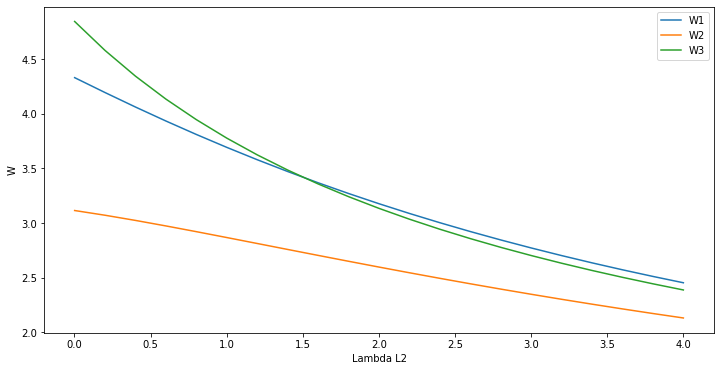

In [42]:
# Построим график
plt.figure(figsize=(12, 6))
plt.xlabel("Lambda L2")
plt.ylabel('W')
plt.plot(lambda_, W1, label='W1')
plt.plot(lambda_, W2, label='W2')
plt.plot(lambda_, W3, label='W3')
plt.legend()

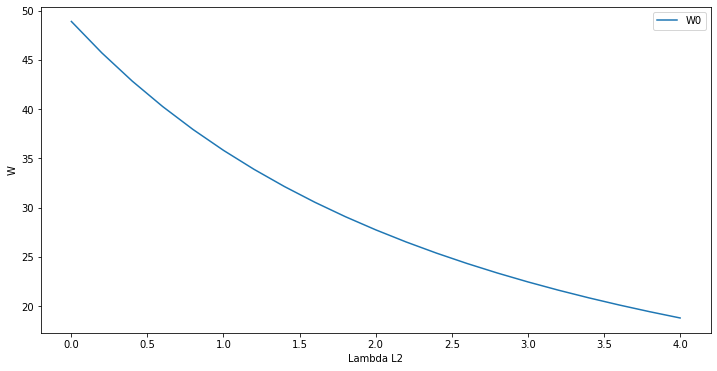

In [43]:
# Построим график для W0
plt.figure(figsize=(12, 6))
plt.xlabel("Lambda L2")
plt.ylabel('W')
plt.plot(lambda_, W0, label='W0')
plt.legend()

__2__. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

В принципе можно, но не имеет практического смысла. Итоговые значения признака будут зависеть от обработки, примененной последней.

__3__. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [44]:
# L1 регуляризация (Lasso)
def eval_model_reg1(X, y, iterations, alpha=1e-2, lambda_=2):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        #if flag and (i % (iterations / 10) == 0):
    print(f'L1 = {lambda_:.4f}, W = {W}, Error = {err:.6f}')
    return W

In [45]:
W = eval_model_reg1(X_st, y, iterations=6000, alpha=1e-2, lambda_=2)

L1 = 2.0000, W = [5.55000000e+01 5.61449755e+00 2.89708850e-02 5.73738827e+00], Error = 27.061389
